In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [4]:
class_names = ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

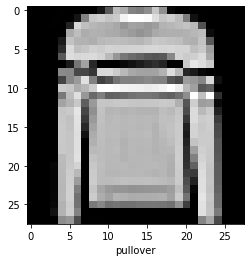

In [12]:
plt.figure()
plt.imshow(train_images[5], cmap='gray')
plt.grid(False)
plt.xlabel(class_names[train_labels[5]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(10000, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

model.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6765 - accuracy: 0.7936
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6183 - accuracy: 0.8456
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6066 - accuracy: 0.8562
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5984 - accuracy: 0.8639
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5942 - accuracy: 0.8679
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5901 - accuracy: 0.8719
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5853 - accuracy: 0.8769
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5823 - accuracy: 0.8799
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5782 - accuracy: 0.8837
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.576

[5.7964931e-12 6.2665072e-17 1.7650073e-08 2.6192585e-21 2.9045362e-09
 7.5526230e-10 7.8900384e-06 5.8516592e-19 9.9999213e-01 1.9264407e-22]
Predicted: bag(0.99999213)


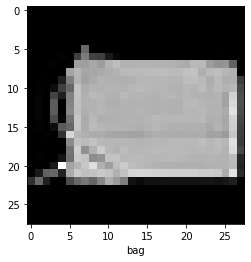

In [23]:
predictions = model.predict(test_images)

imgnum = 18
print(predictions[imgnum])
print('Predicted: ' + class_names[np.argmax(predictions[imgnum])] + '(' + str(np.max(predictions[imgnum])) + ')')
plt.figure()
plt.imshow(test_images[imgnum], cmap='gray')
plt.grid(False)
plt.xlabel(class_names[test_labels[imgnum]])
plt.show()